# Sprawozdanie Fuzzy Logic
### Metody Sztucznej Inteligencji 2019
#### Piotr Kędziora

Jako moją pracę przygotowałem program do symulacji kosztów koncertu. Mamy 3 czynniki, które bierzemy pod uwagę:
- wielkość koncertu
    - kameralny
    - w klubie
    - koncert masowy
- rodzaj wykonawcy
    - support
    - headliner
- wielkość zespołu
    - malutki (np. raper i DJ)
    - średni (np. mały zespół rockowy)
    - duży (np. Golec uOrkiestra)
    - ogromny (np. Oratorium czy koncert symfoniczny)

Najpierw importuję potrzebne biblioteki i definiuję zmienne

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

concert_size = ctrl.Antecedent(np.arange(0, 5000, 1), 'concert_size')
performer = ctrl.Antecedent(np.arange(0, 11, 1), 'performer')
band_size = ctrl.Antecedent(np.arange(1, 101, 1), 'band_size')

cost = ctrl.Consequent(np.arange(1, 10000, 1), 'cost')

teraz definiuję zakresy, zgodnie z intuicją i doświadczeniem

In [2]:
concert_size['cosy'] = fuzz.trimf(concert_size.universe, [0, 0, 50])
concert_size['club_concert'] = fuzz.trimf(concert_size.universe, [30, 200, 1000])
concert_size['mass_concert'] = fuzz.trimf(concert_size.universe, [300, 5000, 5000])

performer['support'] = fuzz.trimf(performer.universe, [0, 0, 4])
performer['headliner'] = fuzz.trimf(performer.universe, [3, 11, 11])

band_size['small'] = fuzz.trimf(band_size.universe, [0, 0, 3])
band_size['medium'] = fuzz.trimf(band_size.universe, [2, 5, 8])
band_size['big'] = fuzz.trimf(band_size.universe, [7, 13, 20])
band_size['huge'] = fuzz.trimf(band_size.universe, [16, 101, 101])

cost['low'] = fuzz.trimf(cost.universe, [0, 0, 2000])
cost['medium'] = fuzz.trimf(cost.universe, [1000, 3000, 6000])
cost['high'] = fuzz.trimf(cost.universe, [5000, 10000, 10000])

poniżej wyświetlam wykresy zbiorów rozmytych, które zdefiniowałem powyżej

C:\Users\ImI\.julia\conda\3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


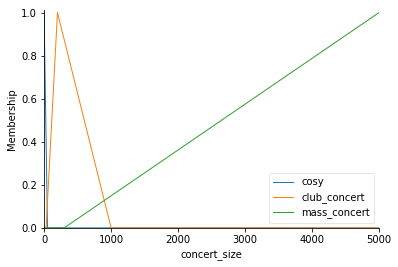

In [3]:
concert_size.view()

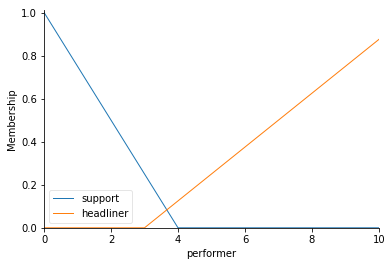

In [4]:
performer.view()

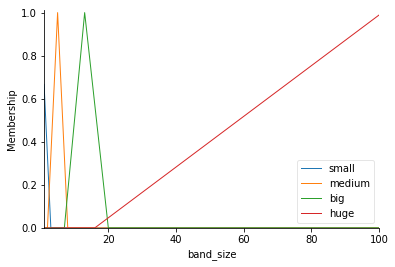

In [5]:
band_size.view()

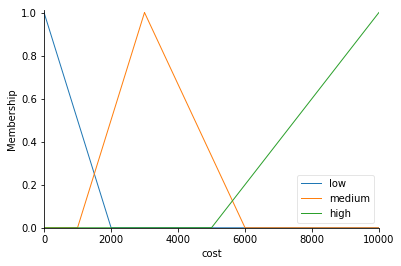

In [6]:
cost.view()

teraz definiuję zasady, które będą odpowiadały za wyznaczanie kosztów

In [7]:
rule1 = ctrl.Rule(concert_size['cosy'] | performer['support'] | band_size['small'], cost['low'])
rule2 = ctrl.Rule(concert_size['cosy'] | performer['headliner'] | band_size['medium'], cost['medium'])
rule3 = ctrl.Rule(concert_size['cosy'] | performer['headliner'] | band_size['big'], cost['medium'])
rule4 = ctrl.Rule(concert_size['club_concert'] | performer['support'] | band_size['medium'], cost['low'])
rule5 = ctrl.Rule(concert_size['club_concert'] | performer['headliner'] | band_size['huge'], cost['high'])
rule6 = ctrl.Rule(concert_size['mass_concert'] | performer['support'] | band_size['small'], cost['low'])
rule7 = ctrl.Rule(concert_size['mass_concert'] | performer['support'] | band_size['huge'], cost['medium'])
rule8 = ctrl.Rule(concert_size['mass_concert'] | performer['headliner'] | band_size['small'], cost['medium'])
rule9 = ctrl.Rule(concert_size['mass_concert'] | performer['headliner'] | band_size['huge'], cost['high'])

wyświetlam graficzną wizualizację zasady 1

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1d77f7c0908>)

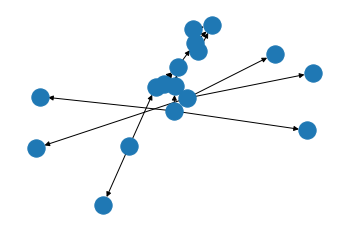

In [8]:
rule1.view()

tworzę teraz system kontrolny dla kosztów:

In [9]:
cost_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

oraz symulację

In [10]:
cost_sim = ctrl.ControlSystemSimulation(cost_ctrl)

teraz wpisuję przykładowe wielkości dla koncertu ze 135 sprzedanymi biletami i zespołem, wielkości 5 osób; sprawdzam ile powinien dostać headliner (performer=10)

In [11]:
cost_sim.input['concert_size'] = 135
cost_sim.input['performer'] = 10
cost_sim.input['band_size'] = 5

dokonuję wyliczenia

In [12]:
cost_sim.compute()

i wyświetlam szacowany koszt

In [13]:
cost_sim.output['cost']

5008.737386623179

możemy też zwizualizować wyniki:

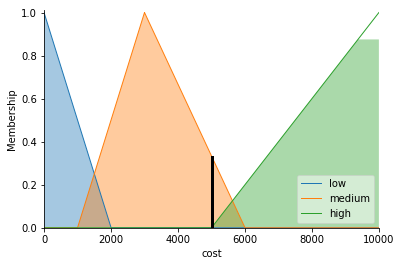

In [14]:
cost.view(sim=cost_sim)